# 12  Regression mehrdimensionaler Datensätze

# 12.3	Einspritzmenge bei einem Common-Rail-System

In [1]:

import scipy
from scipy import io
from scipy import stats
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
""" Laden der Daten"""
data=scipy.io.loadmat('Einspritzmenge.mat')['data']

P=data[:,0]
T=data[:,1]
M=data[:,2]


In [2]:
''' Statistische Bewertung '''
'''"""[0 0; 1 0; 0 1; 1 1; 2 0; 0 2] Vollquadratisches Modell anlegen""" '''
# Model: M = b(1) + b(2)*P + b(3)*T + b(4)*P*T + b(5)*P^2 + b(6)*T^2
data_Dic={'X':P, 'Y':T, 'Z':M}
 
model = ols("Z ~ X + Y + X*Y + I(X**2)+ I(Y**2)" , data_Dic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Z   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3701.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:20:21   Log-Likelihood:                -1924.0
No. Observations:                 928   AIC:                             3860.
Df Residuals:                     922   BIC:                             3889.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3412      0.484     25.496      0.0

ergibt sich folgende Darstellung:


Text(0.5, 0, 'M')

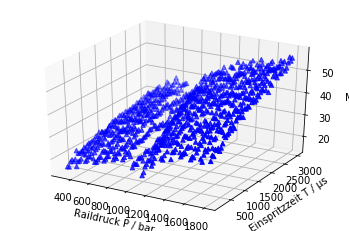

In [3]:
b1,b2,b3,b4,b5,b6=list(model._results.params)

'''% Regressionsfunktion als Grid berechnen'''
pplot= np.arange(300,2100,300)
tplot=np.arange(150,3500,500)
Pplot,Tplot = np.meshgrid(pplot, tplot)
Mplot = b1 + b2*Pplot + b3*Tplot + b4*Pplot*Tplot + b5*(Pplot**2) + b6*(Tplot**2)

print ('ergibt sich folgende Darstellung:')

'''Grafische Darstellung'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P, T, M ,c='b', marker='^')
ax.set_xlabel('Raildruck P / bar') 
ax.set_ylabel(' Einspritzzeit T / µs ') 
ax.set_zlabel('M')  

ergibt sich folgende Darstellung:


Text(0.5, 0, 'Einspritzmenge M')

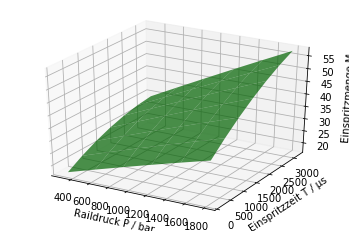

In [4]:
print ('ergibt sich folgende Darstellung:')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Pplot,Tplot,Mplot,color='g', alpha=0.7)
#ax.scatter(P, T, M ,c='b', marker='^')
ax.set_xlabel('Raildruck P / bar') 
ax.set_ylabel('Einspritzzeit T / µs') 
ax.set_zlabel('Einspritzmenge M')  

b) Die Residuen ergeben sich aus der Abweichung von Messwert zu Regressionswert. Sie werden direkt von der Funktion ols übernommen.

Text(0, 0.5, 'Residuen')

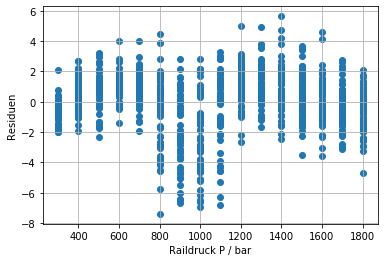

In [5]:
%matplotlib inline
plt.scatter(P,model.resid)
plt.grid(True)
plt.xlabel('Raildruck P / bar')
plt.ylabel('Residuen')

Text(0, 0.5, 'Residuen')

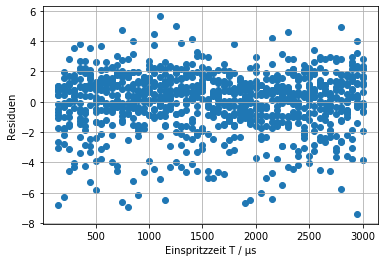

In [6]:

plt.scatter(T,model.resid)
plt.grid(True)
plt.xlabel('Einspritzzeit T / µs')
plt.ylabel('Residuen')

c) Es zeigt sich, dass die Residuen bei Raildrücken im Bereich von 1000 bar eine systematische Abweichung besitzen. Deshalb wird versucht, die Regression zu verbessern, in dem die Ordnung des Regressionspolynoms für den Raildruck erhöht wird. Für Terme bis zur Ordnung M = 4 ergibt sich folgendes Bild:

                            OLS Regression Results                            
Dep. Variable:                      Z   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     2953.
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:20:22   Log-Likelihood:                -1874.0
No. Observations:                 928   AIC:                             3764.
Df Residuals:                     920   BIC:                             3803.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9481      1.539      1.266      0.2

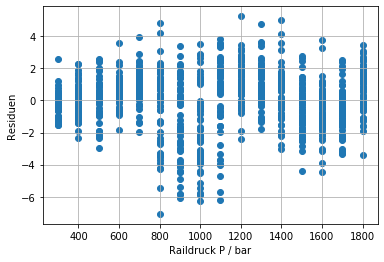

In [7]:
#model = [0 0; 1 0; 0 1; 1 1; 2 0; 0 2; 3 0; 4 0];
model1 = ols("Z ~ X + Y + X*Y + I(X**2)+ I(Y**2)+I(X**3)+I(X**4)" , data_Dic).fit()
plt.scatter(P,model1.resid)
plt.grid(True)
plt.xlabel('Raildruck P / bar')
plt.ylabel('Residuen')
print(model1.summary())

Text(0, 0.5, 'Residuen')

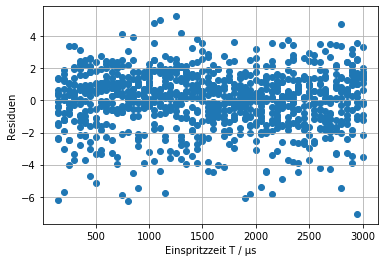

In [8]:
plt.scatter(T,model1.resid)
plt.grid(True)
plt.xlabel('Einspritzzeit T / µs')
plt.ylabel('Residuen')

                            OLS Regression Results                            
Dep. Variable:                      Z   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     293.5
Date:                Tue, 21 Jan 2020   Prob (F-statistic):          8.29e-188
Time:                        14:24:00   Log-Likelihood:                -2896.5
No. Observations:                 928   AIC:                             5805.
Df Residuals:                     922   BIC:                             5834.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.224e-13   7.81e-14      1.566      0.1

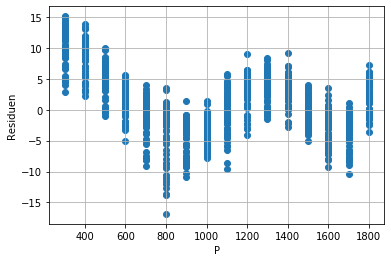

In [18]:
#model = [0 0; 1 0; 0 1; 1 1; 2 0; 0 2; 3 0; 4 0,5 0, 6 0];
model2 = ols("Z ~ X+Y +I( X*Y )+ I(X**2)+ I(Y**2)+I(X**3)+I(X**4)+I(X**5)+I(X**6)" , data_Dic).fit()
plt.scatter(P,model2.resid)
plt.grid(True)
plt.xlabel('P')
plt.ylabel('Residuen')
print(model2.summary())

In [10]:
from scipy.optimize import curve_fit
import scipy
X=data[:,0:2]
X.T[1]
X = scipy.array(X.T)
y = scipy.array(M)
def fn(X, c1, c2, c3,c4,c5,c6,c7,c8,c9,c10):
    return c1 + c2*X[0] + c3*X[1]+c4*X[0]*X[1]+c5*X[0]**2+c6*X[1]**2+c7*X[1]**3+c8*X[1]**4+c9*X[1]**5+c10*X[1]**6
popt, pcov = curve_fit(fn, X, y)
popt

array([ 1.11468100e+01,  1.14603276e-02,  1.17745158e-02,  2.57876282e-06,
       -4.18874097e-07, -7.52210284e-06,  4.47416075e-09, -1.89725693e-12,
        4.45944721e-16, -4.16722404e-20])